In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/statistics_collection')

import StatsAnalytics as sa
import StatsPlots as sp

/Users/maoxiali/miniconda3/envs/cellpose/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# os.chdir('../../')
os.getcwd()

'/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/tutorials'

## 1. Load the tissue dataframes

In [3]:
# Load dataframes
out_root_path = '../../../cell_stats/movie_0608_3/'
df_files = [
    'before_compaction.csv',
    'after_compaction.csv',
]
df_paths = [os.path.join(out_root_path, df_file) for df_file in df_files]

cell_stats_df = sa.prepare_df(paths_to_dfs=df_paths)
cell_stats_df

,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,neighbors,isoperimetric_ratio,num_neighbors,elongation,principal_axes,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area
0,1,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4665.820272,23031.199785,"[2, 3, 5, 7]",191.492113,4,1.211026,[ 0.04433098 -0.43891464 0.89743451],0.332816,"[237.49956332, 814.01416124, 546.87178116, 216...",453.676368,1814.705473
1,2,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4685.199943,23370.999854,"[1, 3, 5, 6]",188.291104,4,1.123069,[ 0.53684144 -0.77411825 0.33547312],0.410332,"[239.59418447, 779.81669822, 659.21595997, 553...",557.964948,2231.859794
2,3,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,5606.154139,26163.626290,"[1, 2, 4, 5, 6, 7]",257.394480,6,1.191556,[-0.51701011 -0.09070299 -0.8511601 ],0.482417,"[832.7607624, 775.12094803, 165.63688424, 199....",544.661027,3267.966164
3,4,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4466.206930,22002.625592,"[3, 7, 8]",184.021051,3,1.180437,[ 0.28471276 -0.8489568 -0.44520894],0.253673,"[164.26287851, 823.37820255, 243.18565712]",410.275579,1230.826738
4,5,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4575.998309,21477.387730,"[1, 2, 3, 6, 7]",207.727814,5,1.160152,[-0.44064841 0.89448046 0.07572109],0.434782,"[541.97858421, 656.84590671, 204.90734128, 219...",480.004423,2400.022114
5,6,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4820.043321,23854.211435,"[2, 3, 5, 7, 8]",196.798913,5,1.254381,[-0.05552831 -0.19360522 0.97950683],0.362687,"[548.09949463, 464.0065793, 218.72255299, 508....",408.013705,2040.068523
6,7,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4510.990477,21713.409355,"[1, 3, 4, 5, 6, 8]",194.697193,6,1.170809,[ 0.48125532 0.02281482 -0.87628352],0.746847,"[218.78467016, 815.06369692, 819.82265452, 773...",631.121952,3786.731711
7,8,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4673.949458,23210.690804,"[4, 6, 7]",189.529101,3,1.305420,[0.35615416 0.0156085 0.93429684],0.241849,"[240.29375958, 300.51581794, 654.09214464]",398.300574,1194.901722
8,1,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,5086.772089,22674.792264,"[2, 3, 4, 6, 7]",256.000141,5,1.285537,[-0.59880844 -0.66325511 0.44891102],0.489471,"[378.16368164, 697.4417848, 790.4406192, 298.5...",599.977041,2999.885205
9,2,embryo,Undefined,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,/Volumes/iber/Projects/Early_Embryo/maoxia/mov...,False,4969.282518,23213.265322,"[1, 3, 4, 5, 7]",227.723890,5,1.258420,[ 0.38535291 -0.12693656 0.91399685],0.532604,"[379.26219011, 993.10549375, 309.59588399, 778...",634.926378,3174.631891


In [4]:
for i in range(len(cell_stats_df)):
    if cell_stats_df.loc[i, 'file_name'].find('time_3') != -1:
        cell_stats_df.loc[i, 'tissue'] = 'before_compaction'
        cell_stats_df.loc[i, 'tissue_type'] = 'early 8-cell stage'
    else:
        cell_stats_df.loc[i, 'tissue'] = 'after_compaction'
        cell_stats_df.loc[i, 'tissue_type'] = 'late 8-cell stage'

pd.set_option('display.max_colwidth', -1)
cell_stats_df

/var/folders/cz/390z_pg17w548jcrhgzmnwv80000gn/T/ipykernel_802/4019874482.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,neighbors,isoperimetric_ratio,num_neighbors,elongation,principal_axes,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area
0,1,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_1.stl,False,4665.820272,23031.199785,"[2, 3, 5, 7]",191.492113,4,1.211026,[ 0.04433098 -0.43891464 0.89743451],0.332816,"[237.49956332, 814.01416124, 546.87178116, 216.31996744]",453.676368,1814.705473
1,2,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_2.stl,False,4685.199943,23370.999854,"[1, 3, 5, 6]",188.291104,4,1.123069,[ 0.53684144 -0.77411825 0.33547312],0.410332,"[239.59418447, 779.81669822, 659.21595997, 553.2329511]",557.964948,2231.859794
2,3,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_3.stl,False,5606.154139,26163.626290,"[1, 2, 4, 5, 6, 7]",257.394480,6,1.191556,[-0.51701011 -0.09070299 -0.8511601 ],0.482417,"[832.7607624, 775.12094803, 165.63688424, 199.73334459, 467.47399998, 827.24022504]",544.661027,3267.966164
3,4,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_4.stl,False,4466.206930,22002.625592,"[3, 7, 8]",184.021051,3,1.180437,[ 0.28471276 -0.8489568 -0.44520894],0.253673,"[164.26287851, 823.37820255, 243.18565712]",410.275579,1230.826738
4,5,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_5.stl,False,4575.998309,21477.387730,"[1, 2, 3, 6, 7]",207.727814,5,1.160152,[-0.44064841 0.89448046 0.07572109],0.434782,"[541.97858421, 656.84590671, 204.90734128, 219.41740544, 776.87287624]",480.004423,2400.022114
5,6,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_6.stl,False,4820.043321,23854.211435,"[2, 3, 5, 7, 8]",196.798913,5,1.254381,[-0.05552831 -0.19360522 0.97950683],0.362687,"[548.09949463, 464.0065793, 218.72255299, 508.58531209, 300.65458412]",408.013705,2040.068523
6,7,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_7.stl,False,4510.990477,21713.409355,"[1, 3, 4, 5, 6, 8]",194.697193,6,1.170809,[ 0.48125532 0.02281482 -0.87628352],0.746847,"[218.78467016, 815.06369692, 819.82265452, 773.24063151, 508.10706206, 651.71299621]",631.121952,3786.731711
7,8,before_compaction,early 8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_3/stats_cell_boundary_time_3_s_4_e_2_d_3/cell_meshes/cell_8.stl,False,4673.949458,23210.690804,"[4, 6, 7]",189.529101,3,1.305420,[0.35615416 0.0156085 0.93429684],0.241849,"[240.29375

## 2. Process dataframe (outlier detection, numerical features extraction, standardization, ...)

In [5]:
# Rename columns
cell_stats_df = sa.rename_features(
    df=cell_stats_df,
    old_names=['area'],
    new_names=['surface_area']
)

In [6]:
# Outlier detection
cell_stats_df = sa.detect_outliers(df=cell_stats_df, quantile_level=0.025)

Found a total of 2 volume outliers in before_compaction sample,
of which:
    - Below lower bound: 1,
    - Above upper bound: 1. 
        
Found a total of 2 volume outliers in after_compaction sample,
of which:
    - Below lower bound: 1,
    - Above upper bound: 1. 
        


In [7]:
# Extract dataframe with only ids and numerical features to make it more handy for plotting
# The function also remove NA's
numeric_cell_stats_df = sa.extract_numerical(
    df=cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ],
    remove_na = True
)

Dropped 0 records containing NAs.


In [8]:
# Get standardized dataset (only numerical features)
std_cell_stats_df = sa.standardize(
    df=numeric_cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ]
)
std_cell_stats_df

,cell_ID,tissue,tissue_type,exclude_cell,volume,isoperimetric_ratio,num_neighbors,elongation,contact_area_fraction,mean_contact_area,surface_area,is_outlier
0,1,before_compaction,early 8-cell stage,False,-0.081328,-0.926267,-0.654654,-0.238745,-1.060869,-0.985940,-0.542980,False
1,2,before_compaction,early 8-cell stage,False,0.117294,-1.068366,-0.654654,-1.668586,-0.561528,-0.262997,-0.483229,False
2,3,before_compaction,early 8-cell stage,False,1.749654,1.999271,1.091089,-0.555250,-0.097169,-0.355221,2.356231,True
3,4,before_compaction,early 8-cell stage,False,-0.682555,-1.257922,-1.527525,-0.735996,-1.570700,-1.286800,-1.158422,False
4,5,before_compaction,early 8-cell stage,False,-0.989570,-0.205532,0.218218,-1.065753,-0.404026,-0.803430,-0.819916,True
5,6,before_compaction,early 8-cell stage,False,0.399743,-0.690688,0.218218,0.466030,-0.868448,-1.302480,-0.067484,False
6,7,before_compaction,early 8-cell stage,False,-0.851610,-0.783987,1.091089,-0.892520,1.606247,0.244138,-1.020347,False
7,8,before_compaction,early 8-cell stage,False,0.023589,-1.013409,-1.527525,1.295731,-1.646864,-1.369813,-0.517916,False
8,1,after_compaction,late 8-cell stage,False,-0.289657,1.937373,0.218218,0.972505,-0.051727,0.028237,0.754887,False
9,2,after_compaction,late 8-cell stage,False,0.025094,0.682134,0.218218,0.531695,0.226130,0.270511,0.392647,False


## 3. Make plots

For all the plotting function we would need a list of the numerical features of the dataframe to plot. <br>
We also need specify a path to a directory in which to save all the plots.

In [9]:
numerical_features = [
    'surface_area', 'volume', 'isoperimetric_ratio', 
    'num_neighbors', 'elongation',
    'contact_area_fraction', 'mean_contact_area'
] # here you can also set the order of variables for the plots
save_plots_dir = '../../../cell_stats/movie_0608_3/'

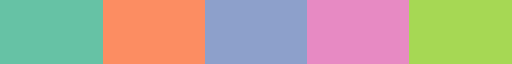

In [10]:
# Create a discrete colormap for plots (not used for correlation matrix)
# Note: in the plotting functions you can either choose a used defined cmap like this one,
# or a normal matplotlib colormap defined by a string (e.g., 'viridis')
colors = np.array([
    [102,194,165],
    [252,141,98],
    [141,160,203],
    [231,138,195],
    [166,216,84]
]) / 255
cell_cmap = sp.create_cmap(color_list = colors)
cell_cmap

### 3.1. Correlation Matrix

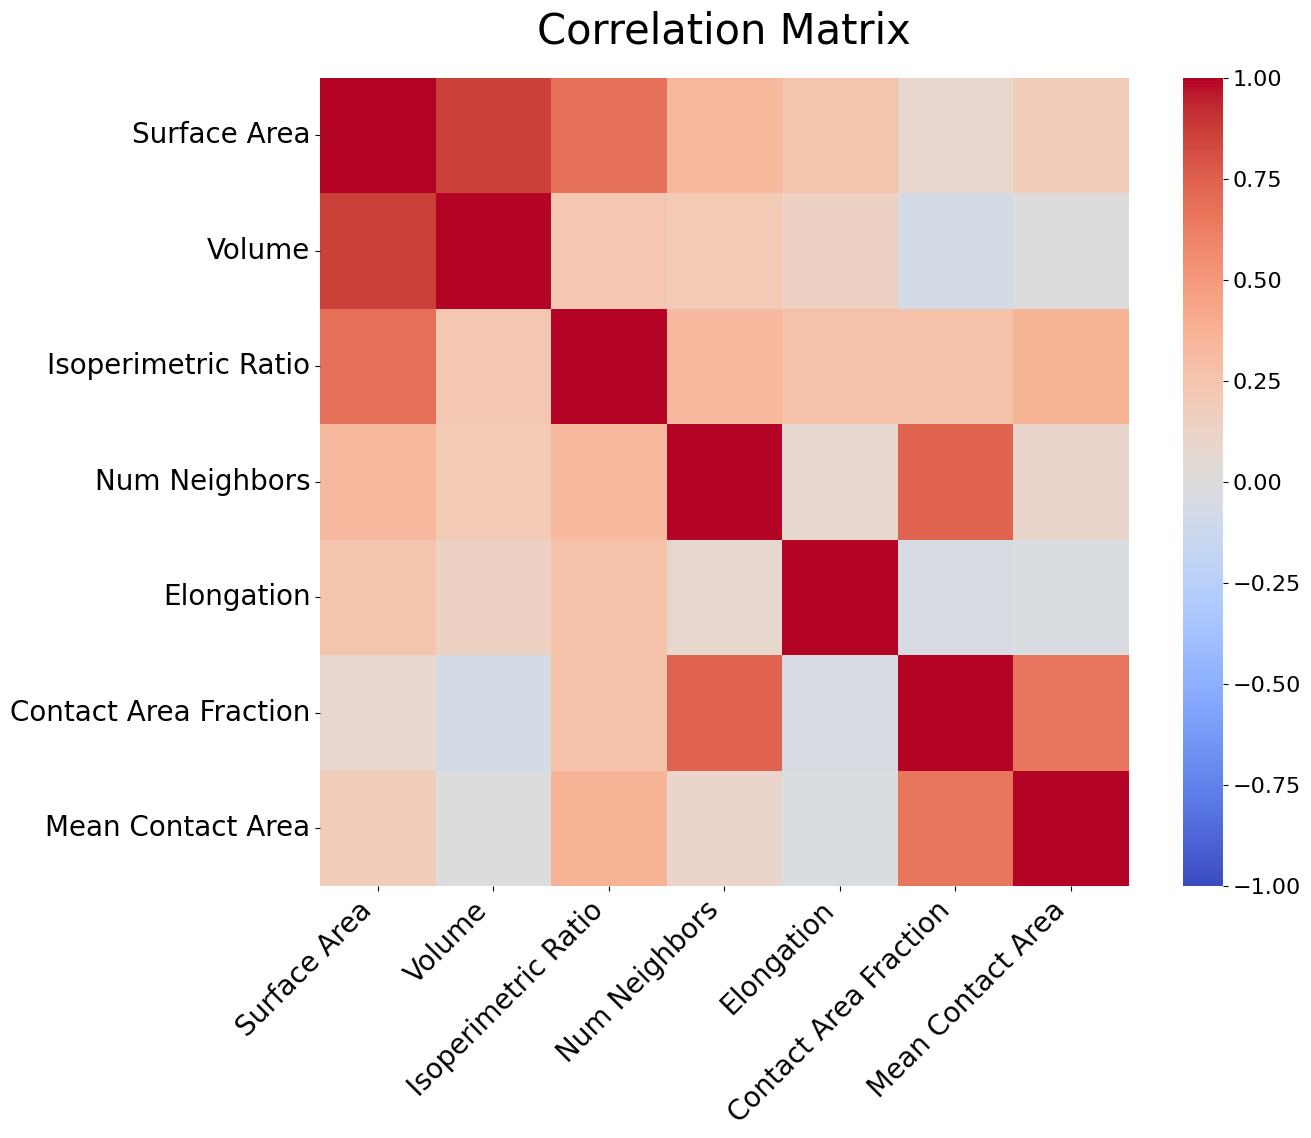

In [11]:
sp.corr_matrix_plot(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=False,
    color_map = 'coolwarm',
    save_dir=save_plots_dir,
    show=True
)

### 3.2. PCA plots

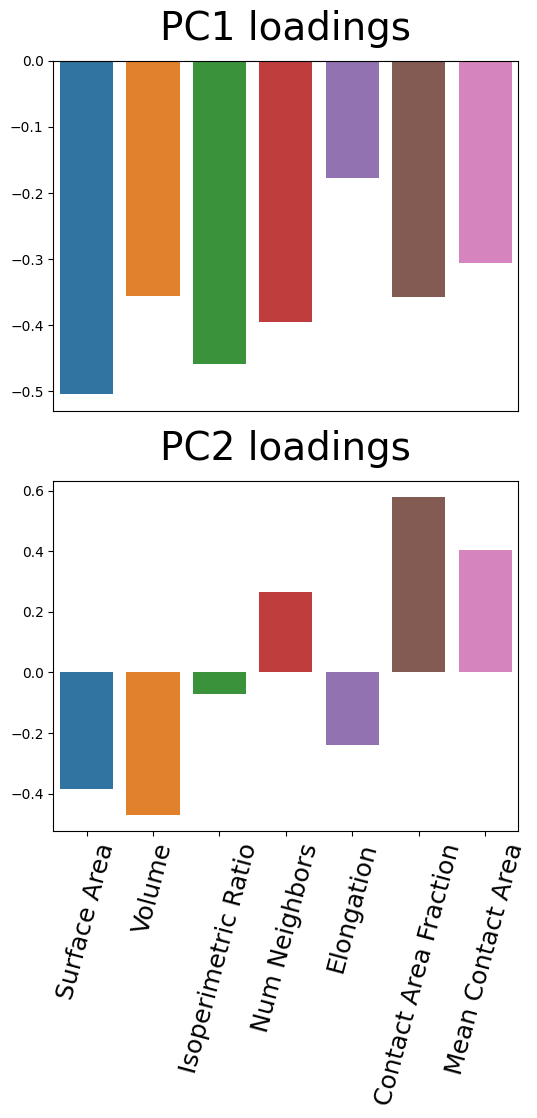

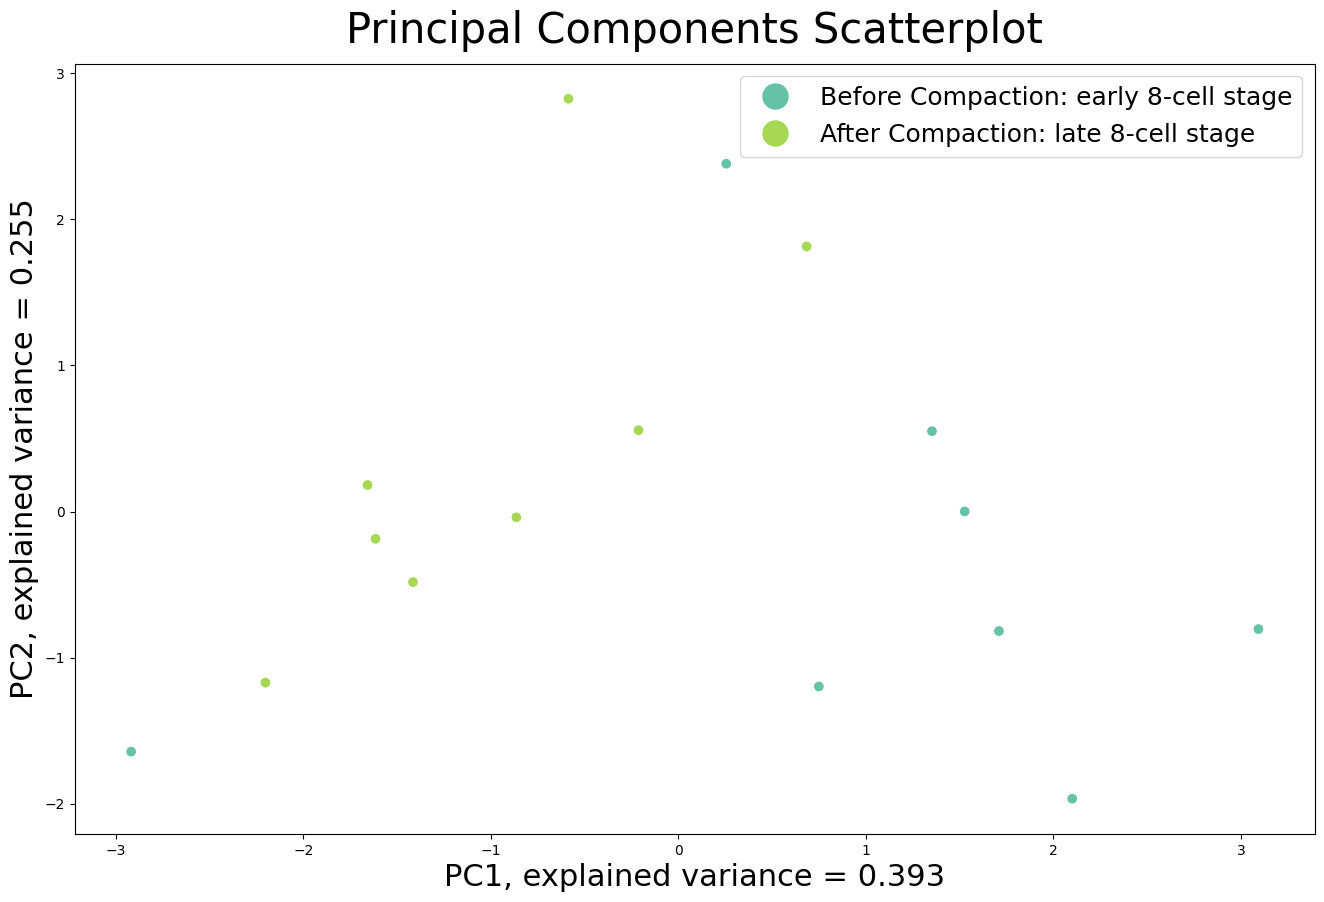

In [12]:
sp.pca_plots(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=False,
    color_map = cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.3. Grid of kdplots for different numerical features

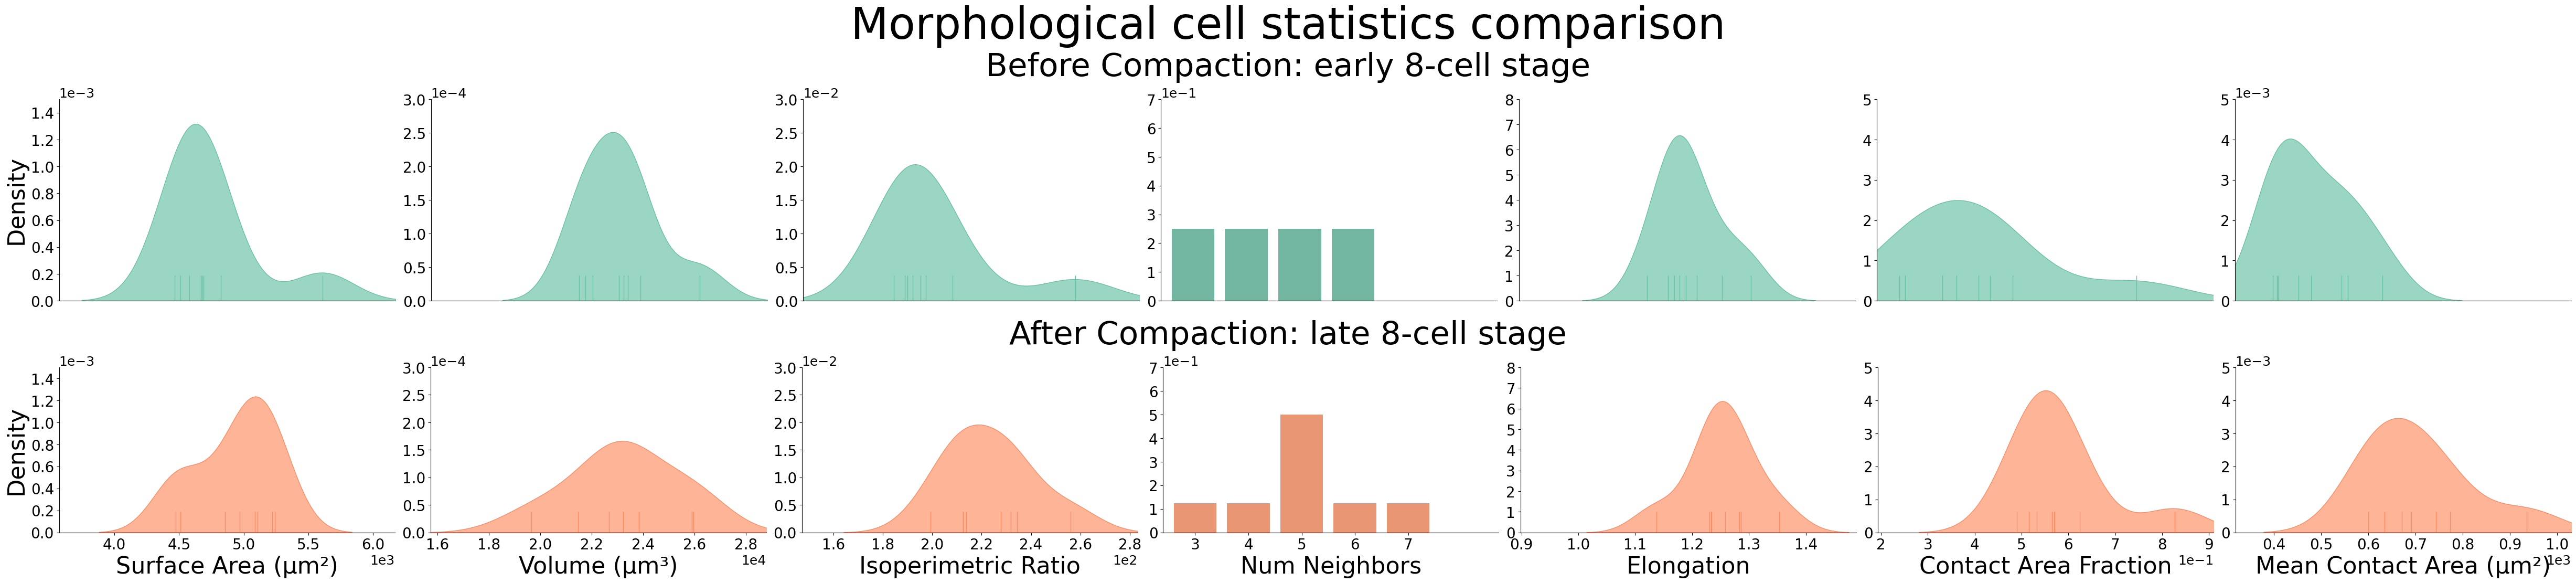

In [13]:
uoms = [
    '\u00B5m' + '\u00B2', 
    '\u00B5m' + '\u00B3', 
    None, 
    None,
    None,
    None,
    '\u00B5m' + '\u00B2'
]

y_lims = [0.0015, 0.0003, 0.03, 0.7, 8.0, 5, 0.0050]

sp.features_grid_kdplots(
    df=numeric_cell_stats_df,
    features=numerical_features,
    y_lims=y_lims,
    remove_outliers=False,
    units_of_measure=uoms,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.4. Lewis' Law plots

Lewis' law states that the average apical area of cells having $n$ neighbors $\bar{A}_n$ is linearly related to the number of neighbors $n$ itself. $\newline$
In particular we have the following relation:
$$ \frac{\bar{A}_n}{\bar{A}} = \frac{n - 2}{4} $$
In 3D we could have a similar relation for volumes, namely:
$$ \frac{\bar{V}_n}{\bar{V}} \sim n $$


/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/statistics_collection/StatsPlots.py:725: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.8)
/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/statistics_collection/StatsPlots.py:732: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(os.path.join(save_dir, save_name), bbox_inches='tight', dpi=150)
/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/statistics_collection/StatsPlots.py:732: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(os.path.join(save_dir, save_name)

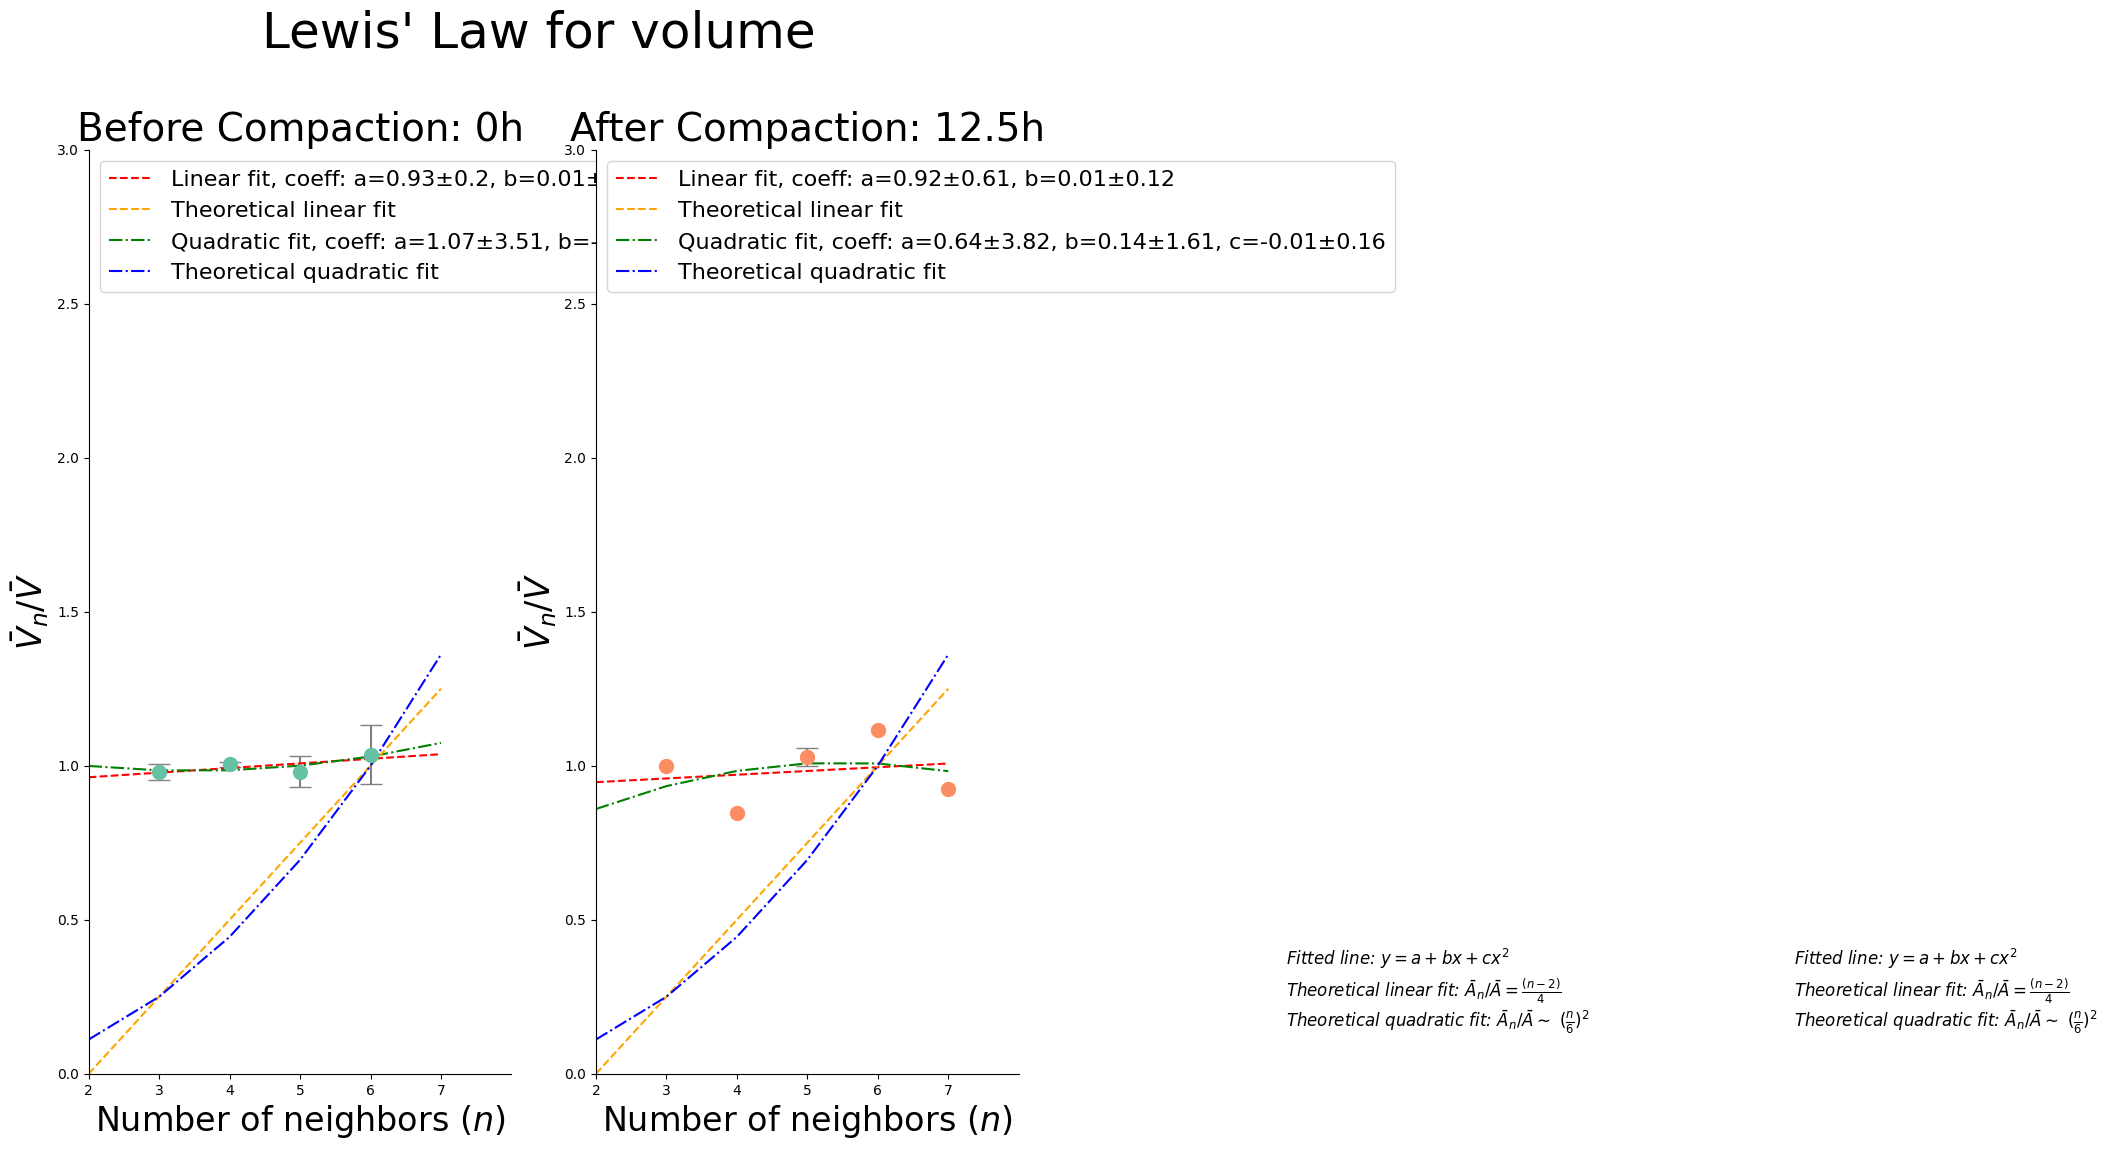

In [14]:
sp.lewis_law_plots(
    df=numeric_cell_stats_df,
    feature='volume',
    fit_degrees=[1,2],
    remove_outliers=False,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.5. Violin Plots for individual samples

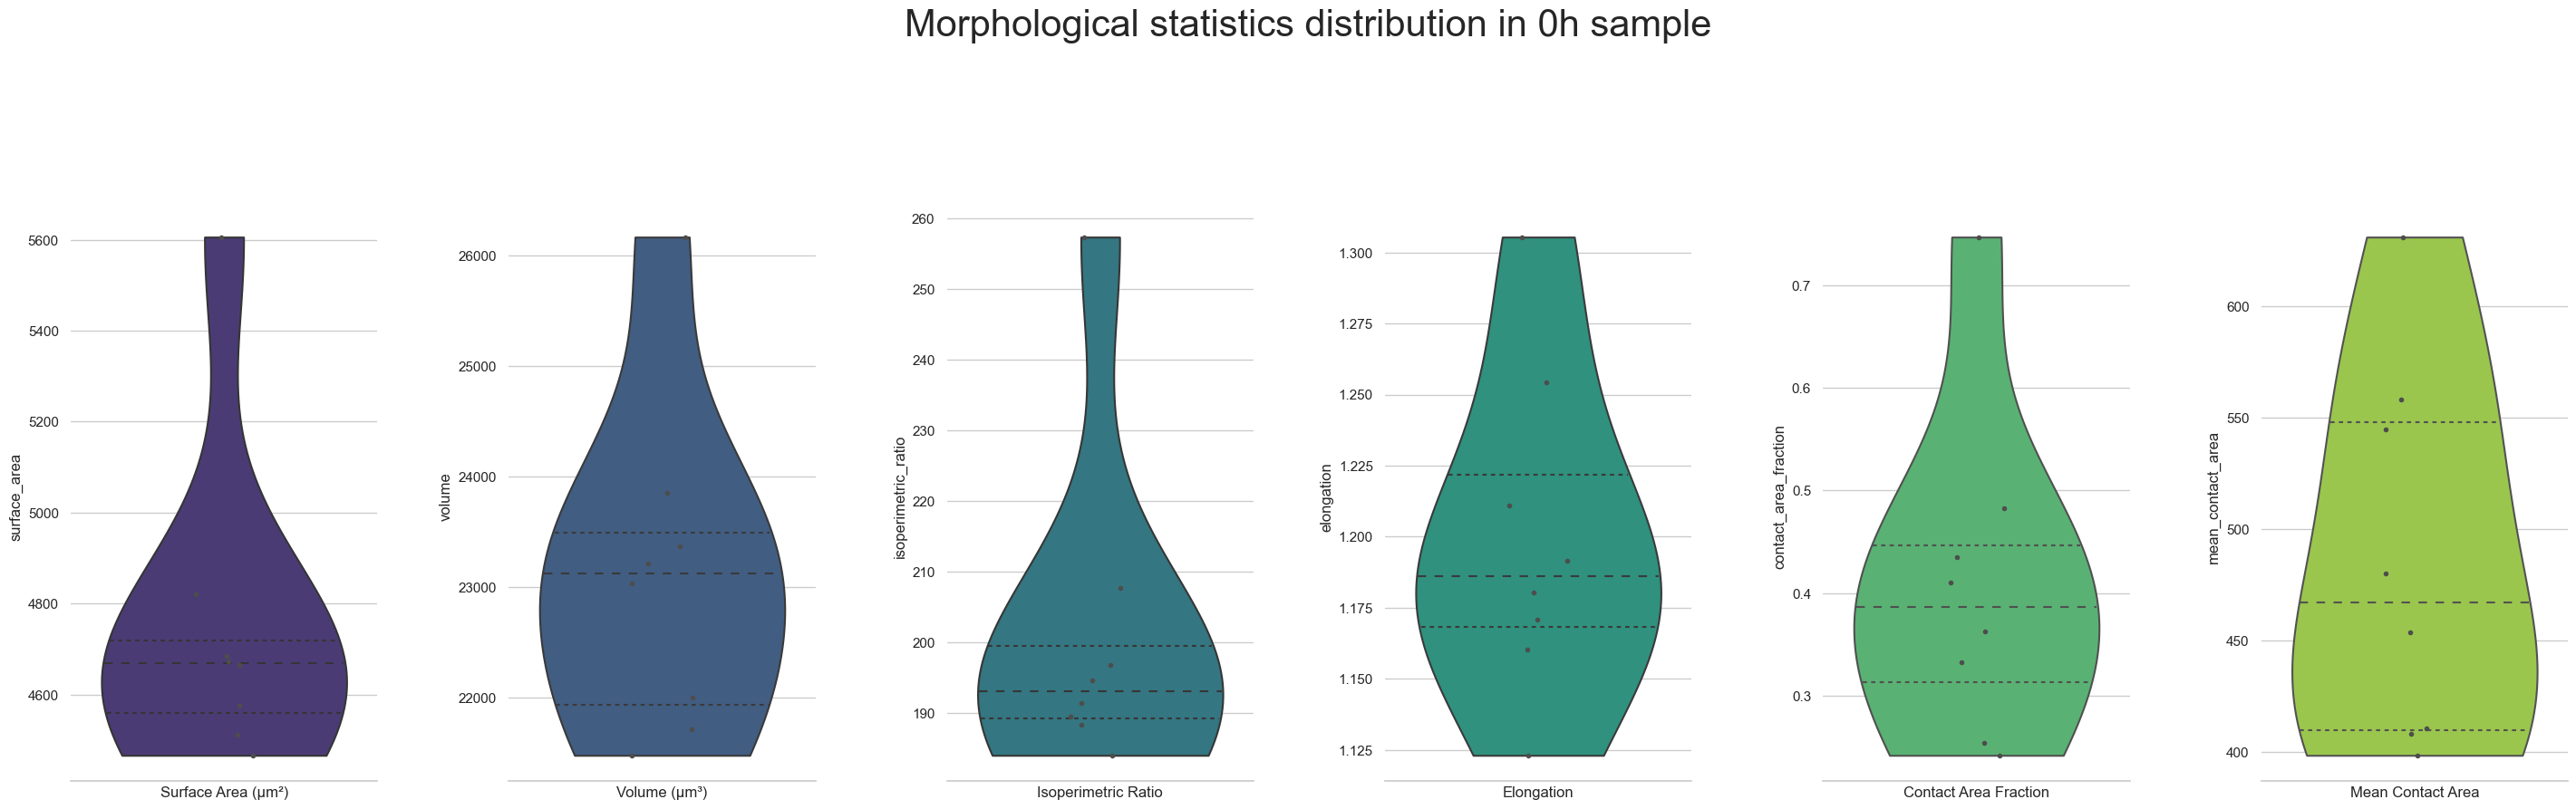

In [17]:
features = [
    'surface_area', 'volume', 'isoperimetric_ratio', 
    'elongation',
    'contact_area_fraction', 'mean_contact_area'
]
sp.violin_plots(
    df=numeric_cell_stats_df, 
    tissue='0h',
    features=features,
    units_of_measure=uoms,
    remove_outliers=False,
    color_map='viridis',
    save_dir=None, 
    show=True
)

### 3.7. Plots of 2D statistics along standard cartesian axes

#### 3.7.0. Number of 2D neighbors barplots

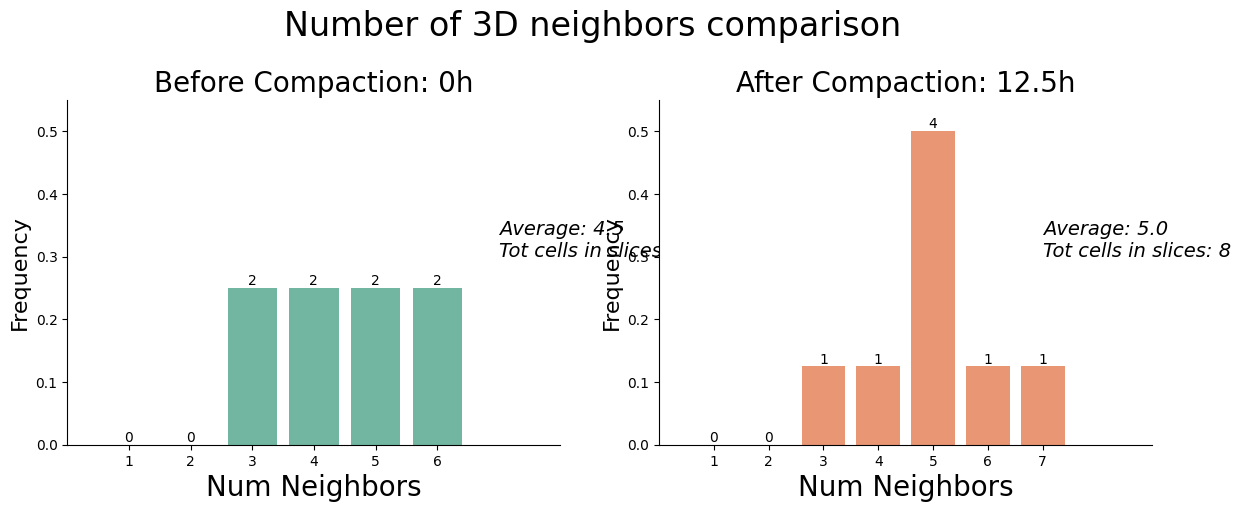

In [42]:
sp.num_neighbors_barplots(
    df=cell_stats_df,
    version='3D',
    remove_outliers=False,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

#### 3.7.1. Lewis Law plots

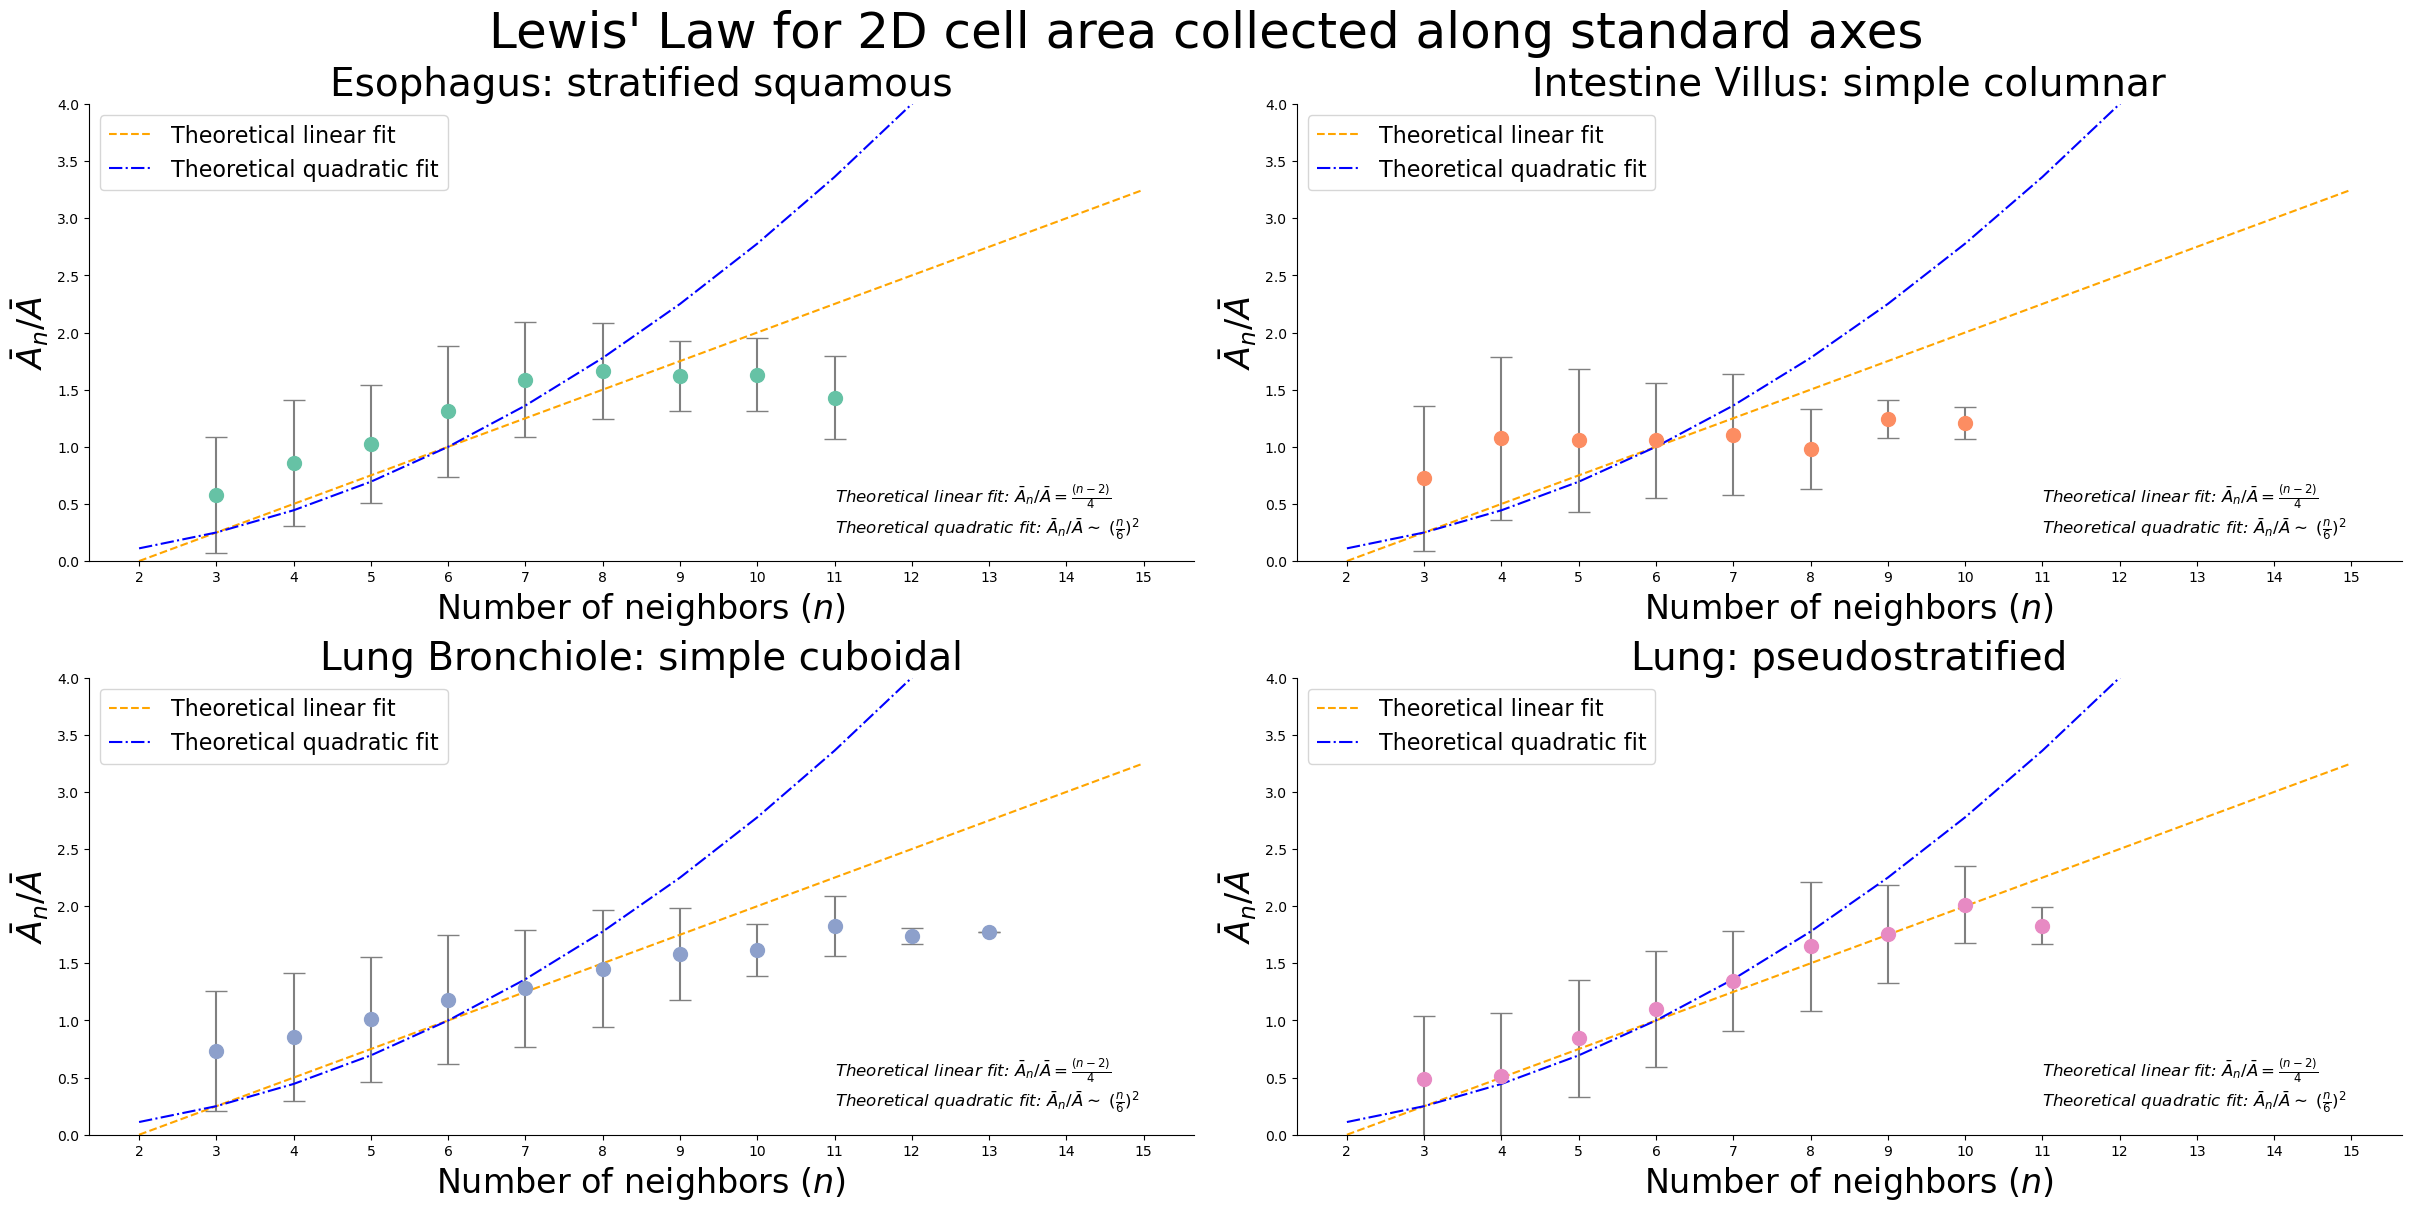

In [ ]:
sp.lewis_law_2D_plots(
    df=cell_stats_df,
    fit_degrees=None,
    version='standard',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir, 
    show=True
)

#### 3.7.2. Aboav-Weaire Law plots

The Aboav-Weaire law states that the average number of neighbours of all n cells that border a cell with n neighbours follows:

$$ m(n) = 5 + \frac{8}{n}$$

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: esophagus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 125/125 [00:03<00:00, 32.41it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: intestine_villus
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 310/310 [00:33<00:00,  9.39it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: lung_bronchiole
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 172/172 [00:15<00:00, 10.86it/s]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TISSUE: lung
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


100%|██████████| 143/143 [00:09<00:00, 14.71it/s]


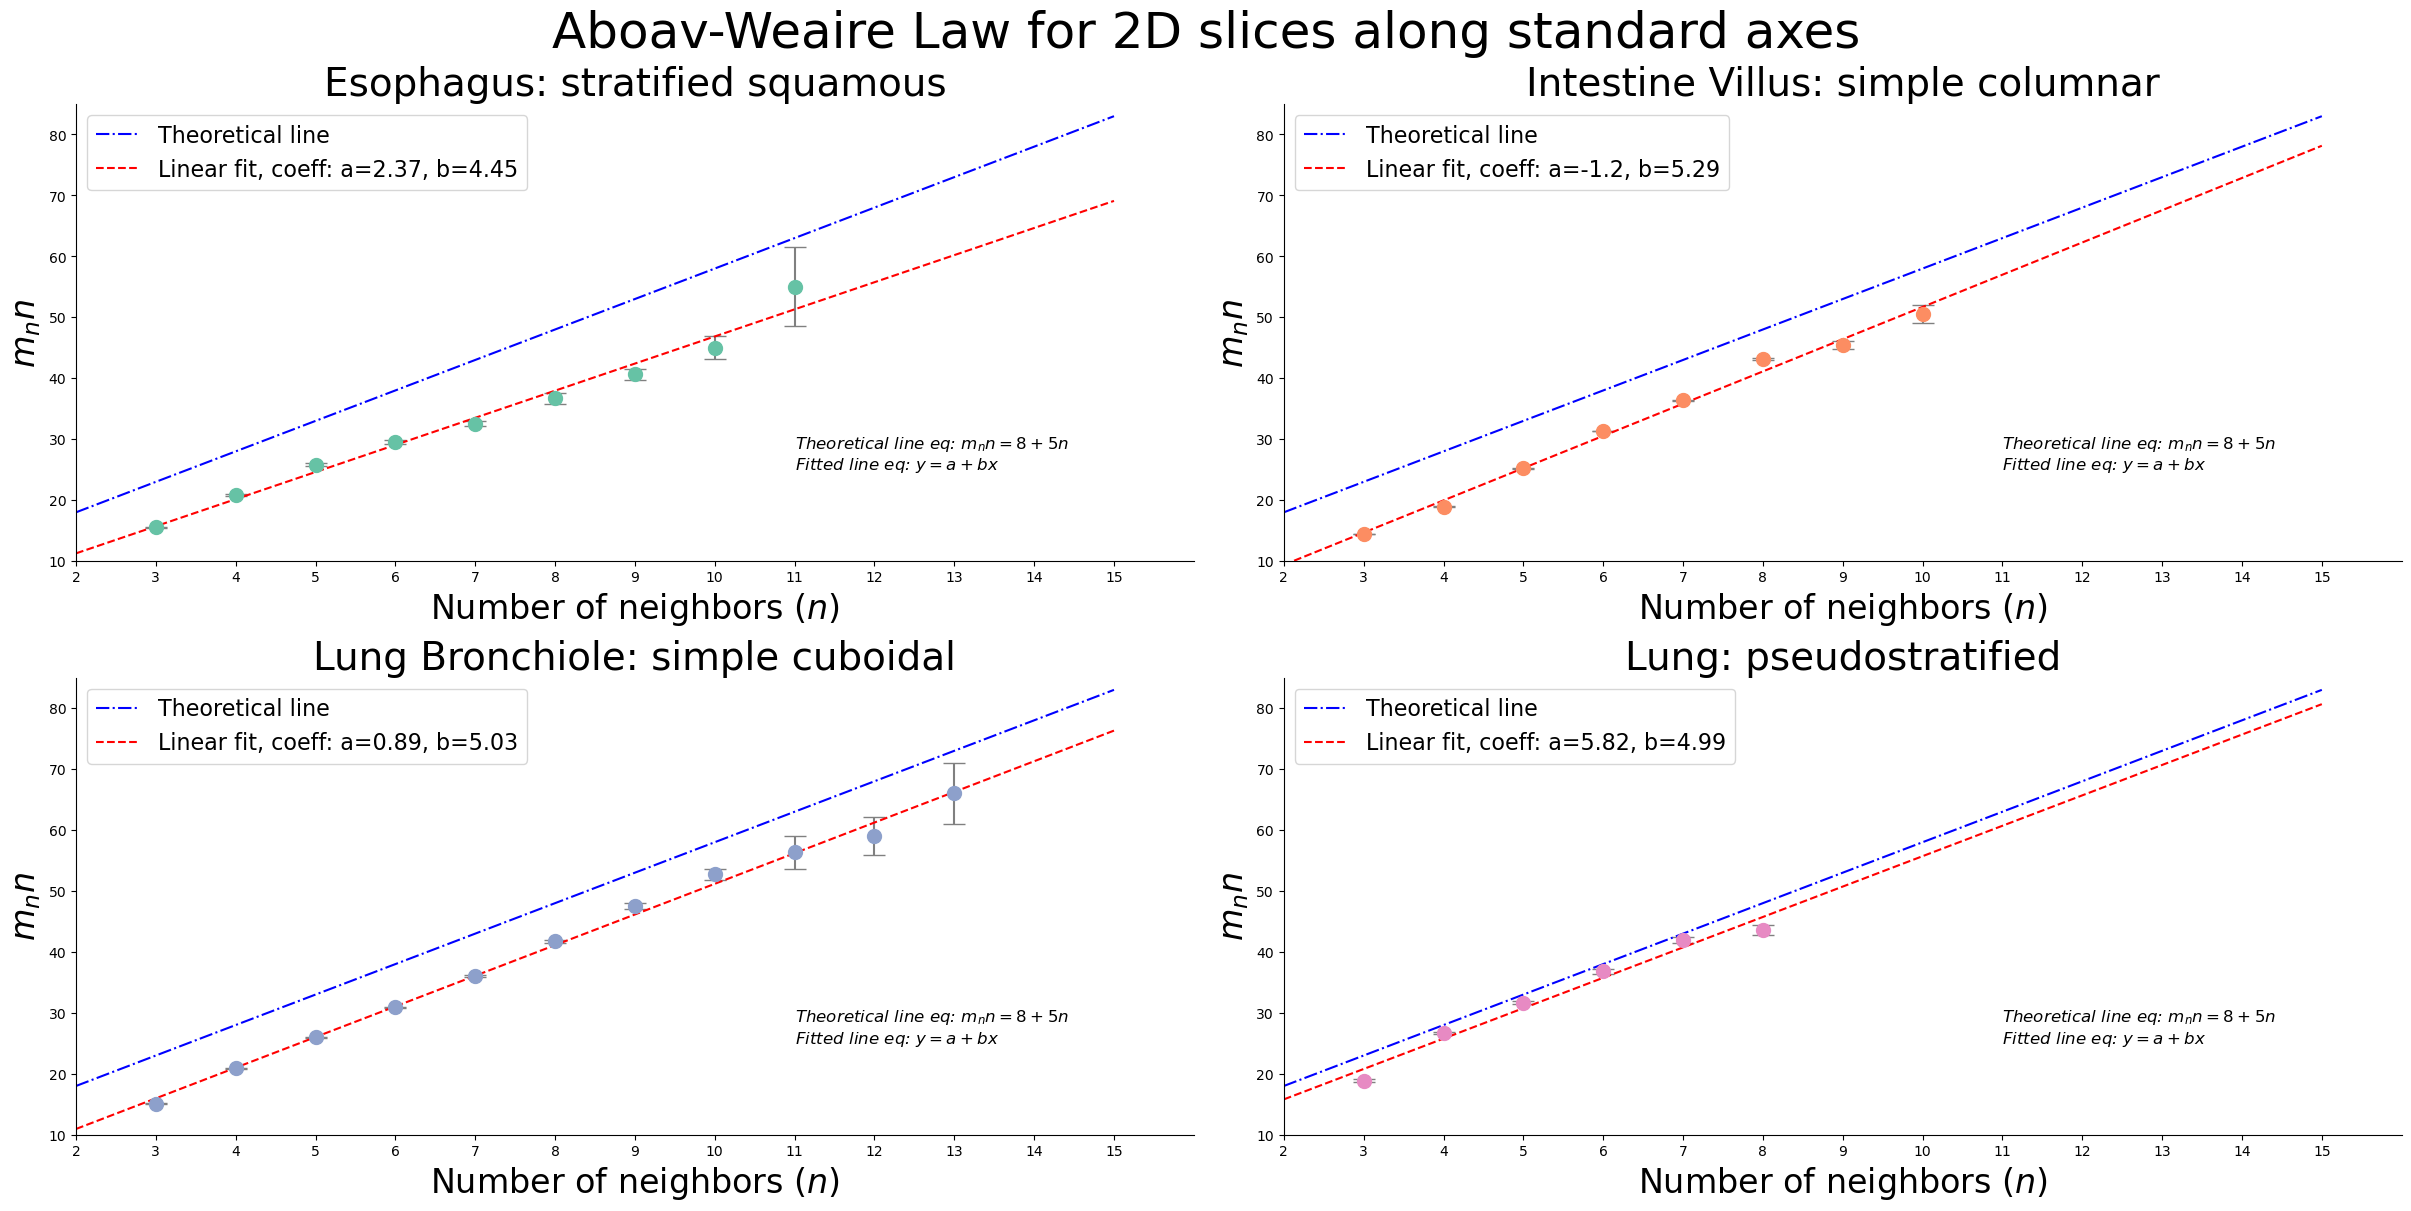

In [ ]:
sp.aboav_wearie_2D_plots(
    df=cell_stats_df,
    version='standard',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.8. Plots of 2D statistics along apical-basal axis of cells

#### 3.8.1. Lewis Law plots

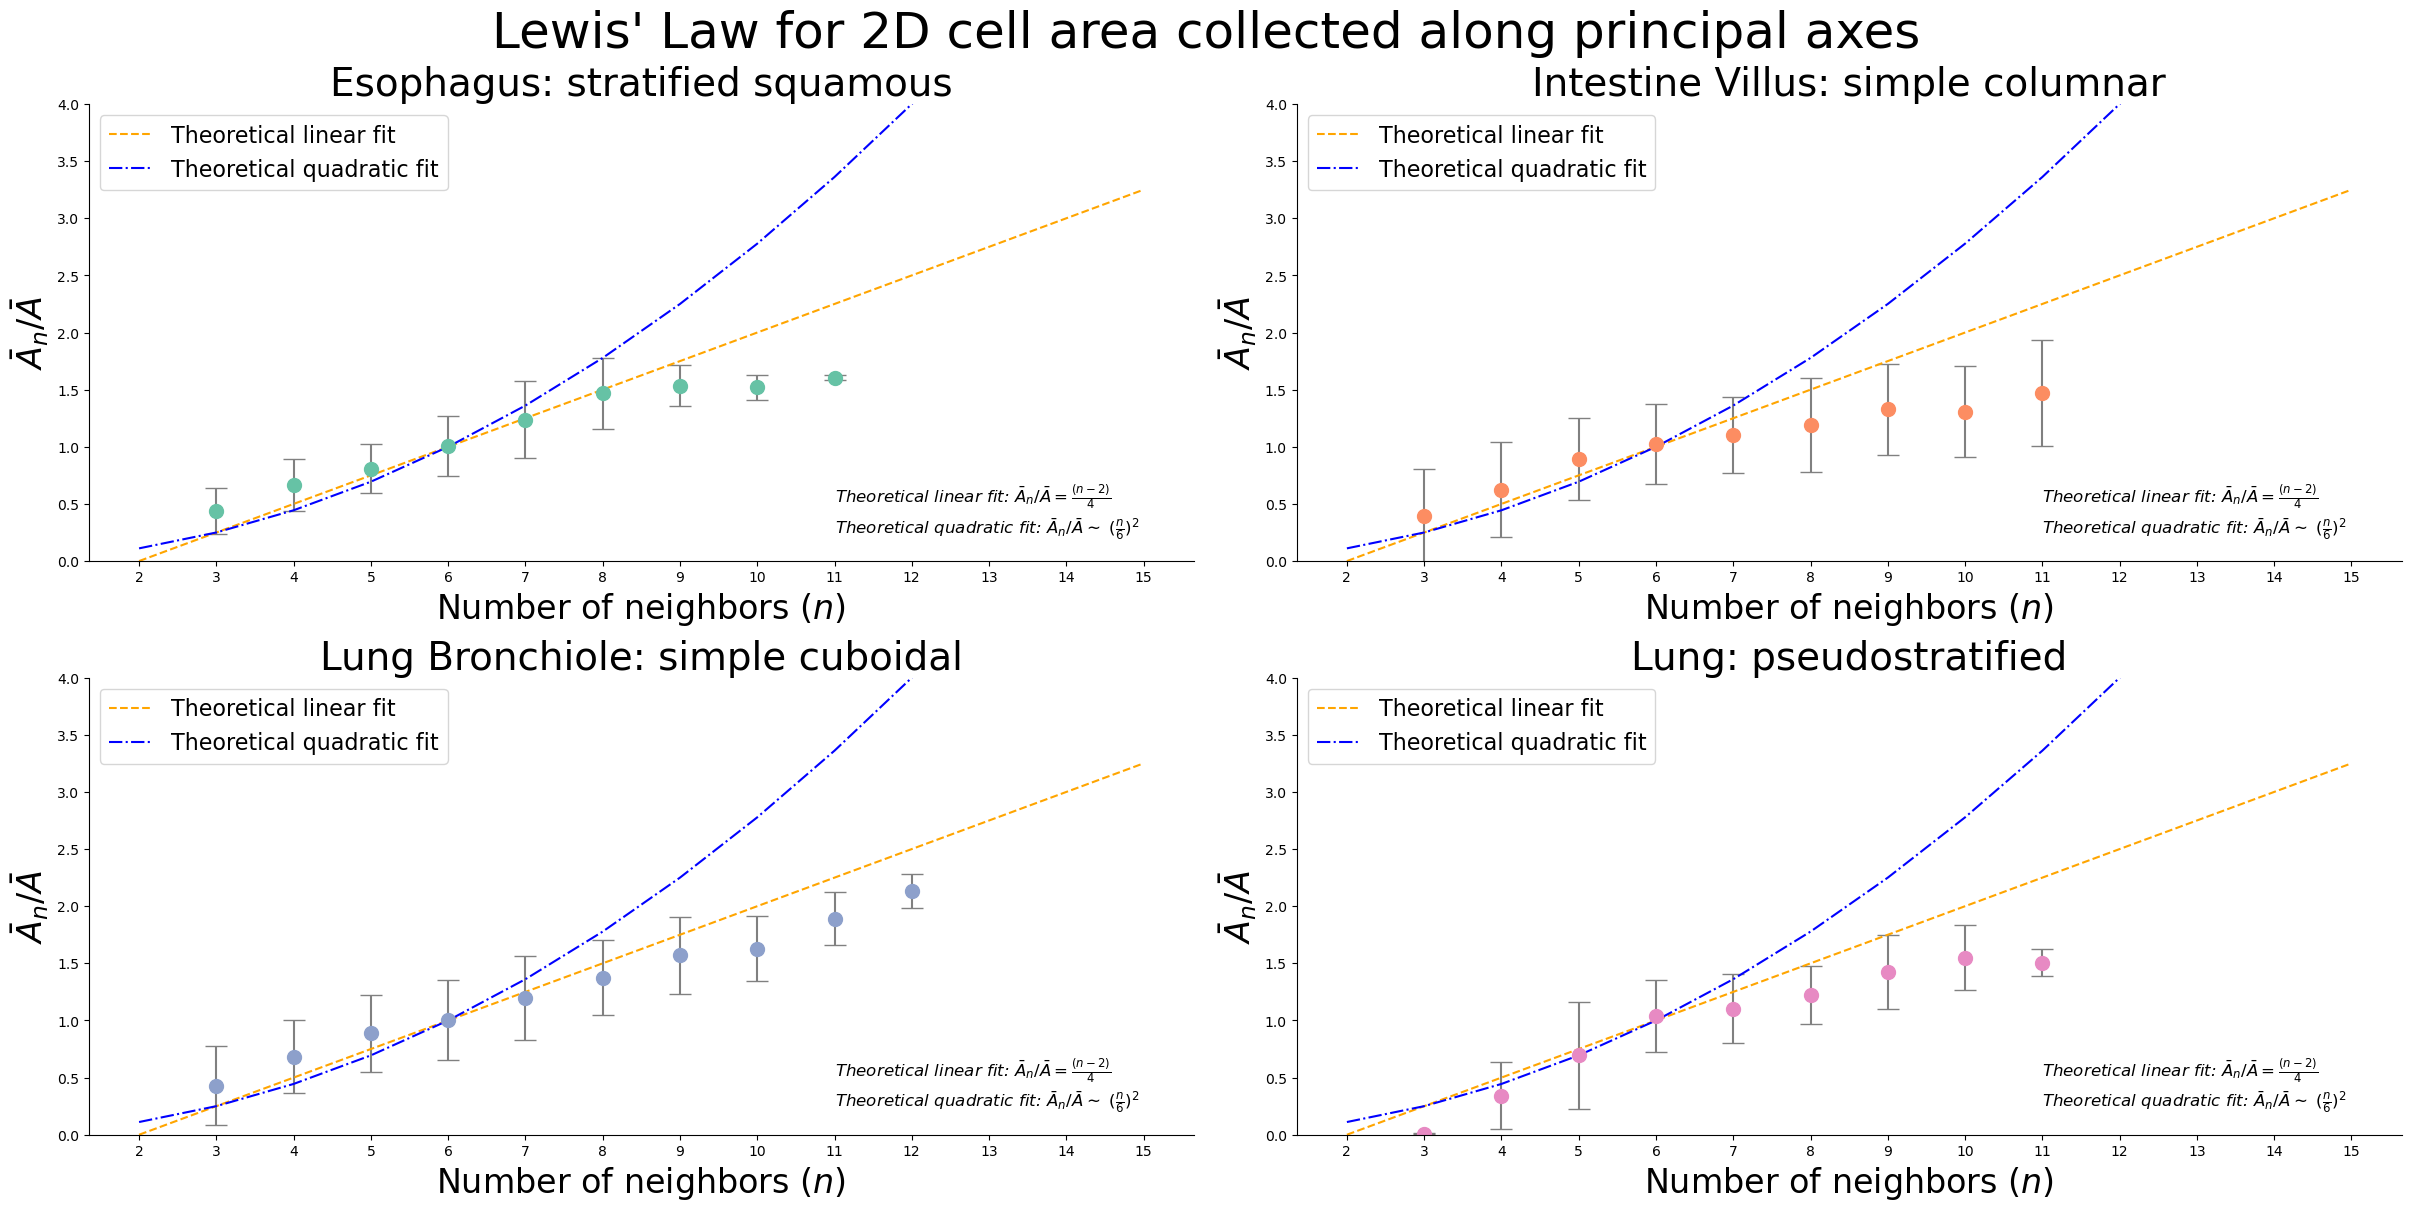

In [ ]:
sp.lewis_law_2D_plots(
    df=cell_stats_df,
    fit_degrees=None,
    version='principal',
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir, 
    show=True
)

#### 3.8.2. Aboav-Weaire Law plots

The Aboav-Weaire law states that the average number of neighbours of all n cells that border a cell with n neighbours follows:

$$ m(n) = 5 + \frac{8}{n}$$

In [ ]:
sp.aboav_wearie_2D_plots(
    df=cell_stats_df,
    version='principal',
    fitted=True,
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)